In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Hp/Downloads/Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df = data.copy()

In [5]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
data.shape

(600, 6)

In [7]:
#creating x and y datasets
x=df.drop(['Taxable.Income'],axis=1)
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [8]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


In [9]:
#transforming string data types to numeric
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
x['Undergrad'] = label_encoder.fit_transform(x['Undergrad'])
x['Marital.Status'] = label_encoder.fit_transform(x['Marital.Status'])
x['Urban'] = label_encoder.fit_transform(x['Urban'])
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [10]:
y = data[['Taxable.Income']]
y.head()

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002


In [11]:
y['tax']=['risky' if x<=30000 else 'good' for x in y['Taxable.Income']]

C:\Users\hp\AppData\Local\Temp/ipykernel_9616/1884946617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['tax']=['risky' if x<=30000 else 'good' for x in y['Taxable.Income']]


In [12]:
y= y.drop(['Taxable.Income'],axis=1)

In [13]:
y.head(100)

,tax
0,good
1,good
2,good
3,good
4,good
...,...
95,good
96,risky
97,good
98,risky


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [17]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

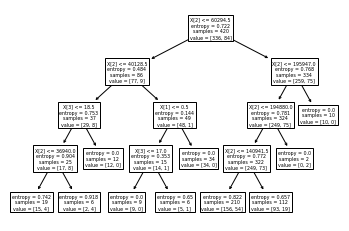

In [18]:
tree.plot_tree(model);

In [19]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [20]:
y.columns

Index(['tax'], dtype='object')

In [21]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['good','risky']

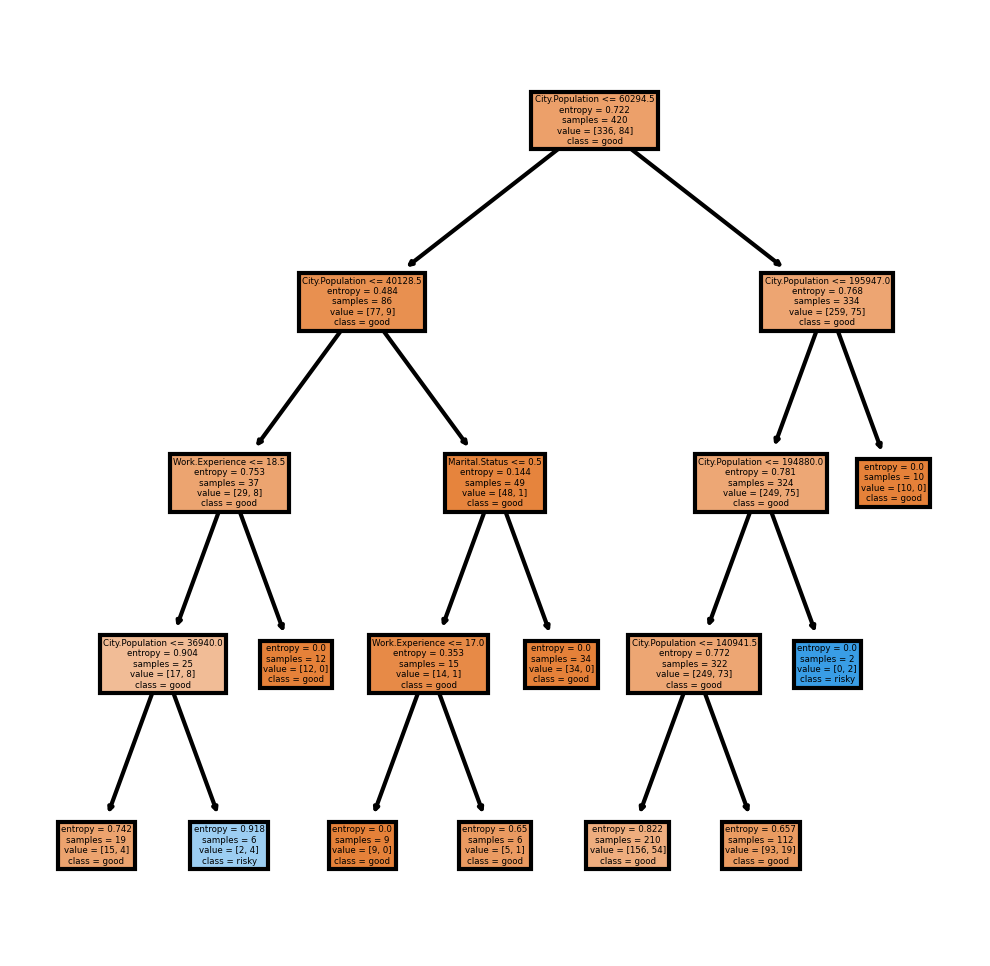

In [22]:
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [23]:
pred = model.predict(x_test)

In [24]:
pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
    

In [25]:
pd.Series(pred).value_counts()

good     177
risky      3
dtype: int64

In [26]:
from sklearn.metrics import classification_report

In [27]:
model.score(x_test,y_test)

0.7611111111111111

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [29]:
company=pd.read_csv("C:/Users/Hp/Downloads/Company_Data.csv")

In [30]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [31]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [32]:
company['Sales_Efficiency'] = company.Sales.map(lambda x: 'High' if x>8 else 'Low')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Efficiency
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [33]:
company1= pd.get_dummies(company,columns=['ShelveLoc','Urban','US'])

In [34]:
company1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_Efficiency,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,High,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,High,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,High,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,Low,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,Low,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,High,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,Low,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,Low,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,Low,1,0,0,0,1,0,1


In [35]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']

In [36]:
X = company1[feature_cols]
Y = company1['Sales_Efficiency']

In [37]:
Y.value_counts()

Low     236
High    164
Name: Sales_Efficiency, dtype: int64

In [38]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=0)

In [39]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [40]:
model.get_n_leaves()

21

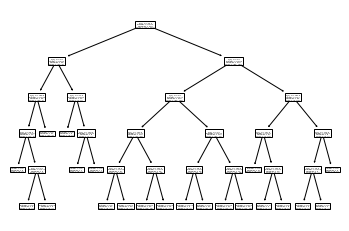

In [41]:
#PLot the decision tree
tree.plot_tree(model);

In [42]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Low     44
High    36
dtype: int64

In [43]:
preds

array(['High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'Low', 'High', 'High', 'High', 'High', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High',
       'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'High', 'High',
       'High'], dtype=object)

In [44]:
pd.crosstab(Y_test,preds)

col_0,High,Low
Sales_Efficiency,,
High,26,11
Low,10,33


In [45]:
Y_test.value_counts()

Low     43
High    37
Name: Sales_Efficiency, dtype: int64

In [46]:
# Accuracy 
np.mean(preds==Y_test)

0.7375

In [47]:
model.score(X_train,Y_train)

0.85625

In [48]:
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 73.75


In [49]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

        High       0.70      0.72      0.71        36
         Low       0.77      0.75      0.76        44

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



In [50]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [51]:
#prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.7375

In [52]:
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
print("Accuracy", accuracy_score(Y_test,preds)*100)

Accuracy 73.75
